<h3>End-to-end machine learning project</h3>

Steps:
1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.

This notebook uses the 1990s California Housing Prices dataset from the StatLib repository.

The model we will use is a supervised, multi-variate regression using batch learning.

The cost function used is RMSE:

RMSE(**X**, h) = $\sqrt {\frac{1} {m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})^2}$

where <i>m</i> is the number of instances, $x^{(i)}$ is a vector of all of the feature values (excluding the label) of the $i^{th}$ instance in the dataset, and $y^{(i)}$ is the label of that instance.

**X** is a matrix containing all the feature values (excluding labels) of all instances in the dataset.

<i>h</i> is the system's prediction function, also called a <i>hypothesis</i>. A prediction is made based on a feature vector $x^{(i)}$ and outputs a predicted value $\hat{y}^{(i)} = h(x^{(i)})$

RMSE(**X**, h) is the cost function measured on the set of examples using your hypothesis h.

RMSE corresponds to the <i>euclidean</i> or $\ell_{2}$ norm, while MAE corresponds to the <i>manhattan</i> or $\ell_{1}$ norm.

MAE(**X**, h) = $\frac{1} {m} \sum_{i=1}^{m} \lvert h(x^{(i)}) - y^{(i)}\rvert$

The higher the norm index, the more it focuses on large values and neglects small ones. If outliers are rare, RMSE performs very well and is preferred. If we had a lot of outlier districts in our data, we would consider using MAE.

In [1]:
# Fetch the data
import os
import tarfile
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

# Creates a /datasets/housing directory in current directory, and extracts housing data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Info gives a quick description of the data
# Here we can see that total_bedrooms has 207 missing values
# All fields are numerical except for ocean_proximity, which is a categorical text attribute
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Let's see what the categories are and how many housing districts belong to each
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
# Summary of numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108f2a2d0>,
      dtype=object)

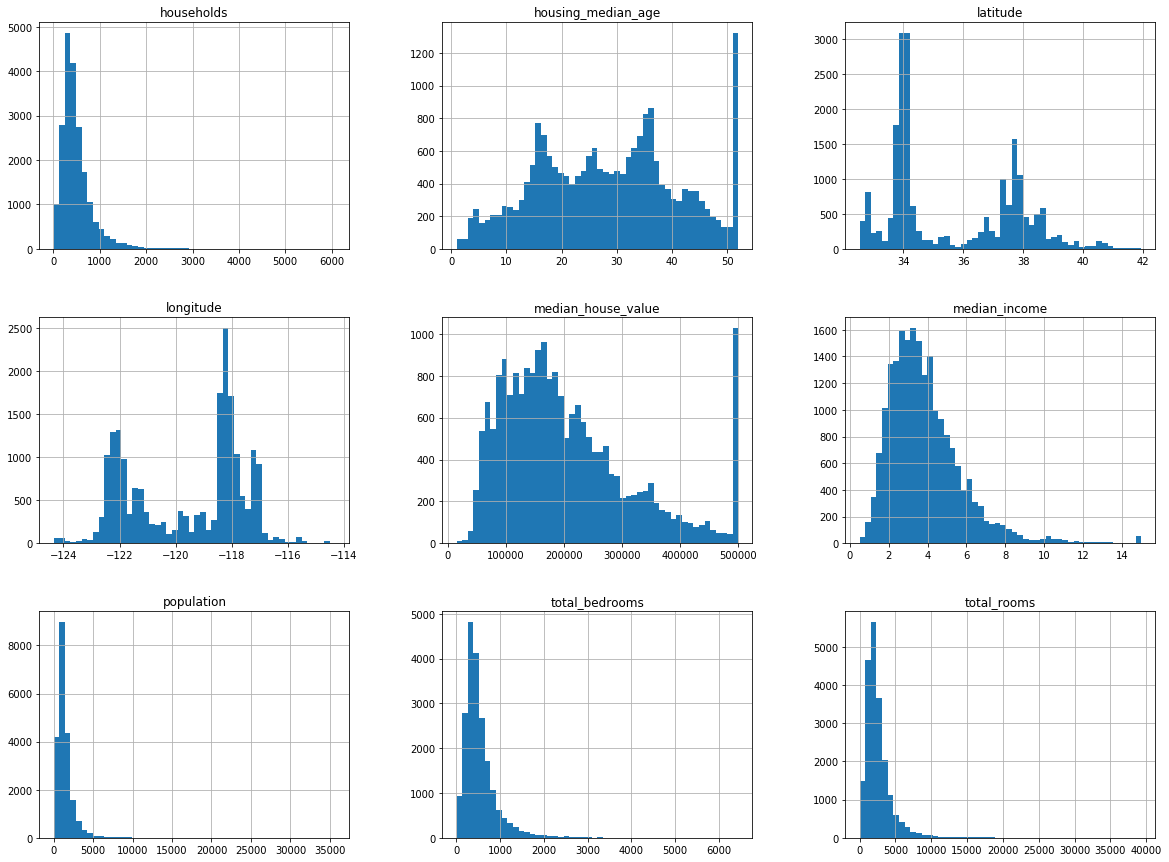

In [7]:
# Plot a histogram for each numerical attribute
housing.hist(bins=50, figsize=(20,15))

<h3>Key takeaways from these plots:</h3>
    
1. `median_income` does not appear to be expressed in USD. In fact, looking at the result from `housing.describe()`, we can see that the min and max values are (0.499900, 15.000100). Working with pre-processed values is common in ML.


2. `housing_median_age` and `median_house_value` are also capped. `median_house_value` may be a problem since it is our target attribute. If we need precise predictions above \\$500,000, then we will need to collect proper labels from the districts impacted by the cap, or remove those districts from the dataset since the system should not be penalized for predicting values beyond \\$500,000.


3. These attributes have very different scales. We will address this with feature scaling.


4. Many of these histograms are <i>tail heavy</i>, meaning they extend much farther to the right of the median than to the left. This makes it more difficult for some ML algorithms to detect patterns. We will transform these attributes later on to have more bell-shaped distributions.

In [8]:
# Before we go any further, let's split the data into train and test sets to avoid "data snooping bias"
# Create split_train_test, which is basically the train_test_split method from sklearn.model_selection
def split_train_test(data, test_ratio, random_seed=42):
    np.random.seed(random_seed)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = split_train_test(housing, 0.2)
print(f"Training set size: {len(train_set)}\nTesting set size: {len(test_set)}")

Training set size: 16512
Testing set size: 4128


In [10]:
# Note that this solution will break next time we fetch an updated dataset
# We could hash each instance's unique and immutable identifier and only place certain values in the test set
# This way the test set remains consistent across multiple runs, even with fresh data
# The housing data does not have an identifier, so we can just use the row index as the ID
# We could also use lat/long:
# housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Note that this is using a purely random sampling method. This is generally fine if your dataset is large enough (especailly relative to the number of attributes), but if not, you run the risk of introducing significant sampling bias. For example, the US population is comprise of 51.3% females and 48.7% males, so a well-conducted survey in the U.S. with 1,000 participants should maintain this ratio: 513 females, 487 males. This is called <i>stratified</i> sampling. The population is divided into homogenous subgroups called <i>strata</i>, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population.

If this ratio is not maintained, the survey results would be significantly biased and would not be representative of the whole population.

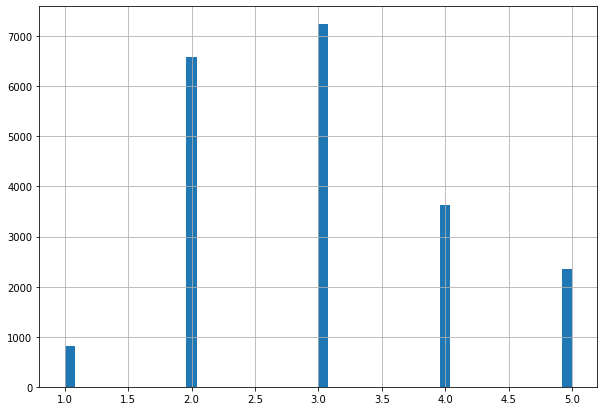

In [12]:
# Create an income category attribute
# We want to limit the number of categories (divide by 1.5), and we want discrete categories (np.ceil) 
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing["income_cat"].hist(bins=50, figsize=(10,7))

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

# Now we can do stratified sampling based on income category
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
        strat_train_set = housing.loc[train_index]
        strat_test_set = housing.loc[test_index]

In [14]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [15]:
# Drop the income_cat attribute to get the dataset back to original state
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [16]:
# Copy the stratified training set to avoid harming the original
housing = strat_train_set.copy()

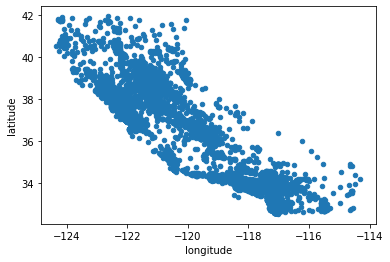

In [17]:
# Exploratory data analysis
# Visualize the housing districts on a scatterplot
housing.plot(kind="scatter", x="longitude", y="latitude")

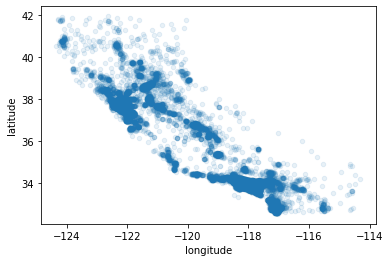

In [18]:
# It's hard to see any pattern here, so let's set an alpha value of 0.1 to see which areas have high density
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

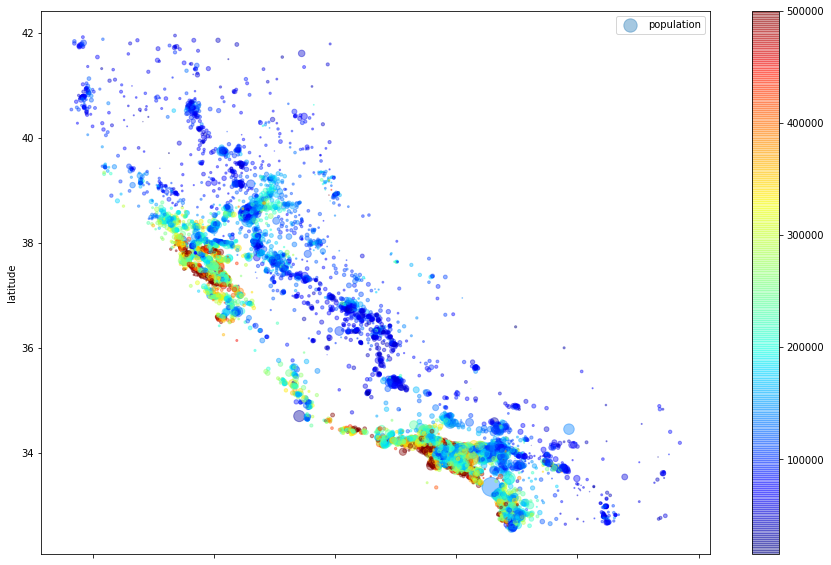

In [19]:
# Let's visualize the prices with different colors
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population",
            c=housing["median_house_value"], cmap=plt.get_cmap("jet"), colorbar=True,
             figsize=(15,10)
            )

This shows us that location and population density are important factors for price. It may be useful to use a clustering algorithm to detect the main clusters, and add new features that measure proximity to those clusters. The ocean-proximity feature may be useful as well, though northern California doesn't have high coastal prices, so it's not a simple rule.

In [20]:
# Compute the standard correlation coefficient between every pair of attributes
housing_corr = housing.corr()

In [21]:
# See how each value correlates with the median house value
housing_corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

The correlation coefficient only measures linear correlations (“if x goes up, then y generally goes up/down”). It may completely miss out on nonlinear relationships (e.g., “if x is close to zero then y generally goes up”).

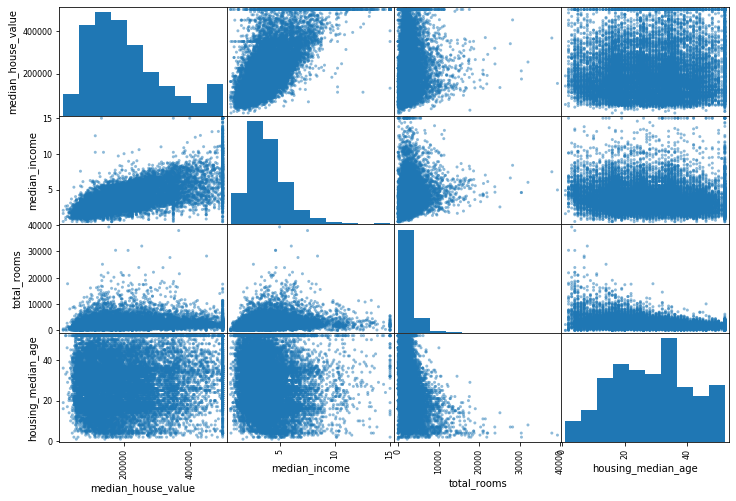

In [22]:
# scatter_matrix plots every numerical attribute against every other numerical attribute
from pandas.plotting import scatter_matrix

# Only focus on a few promising attributes
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8));

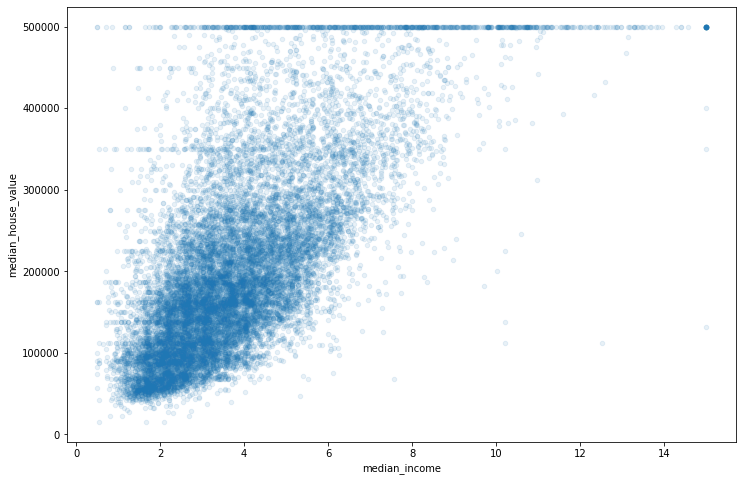

In [23]:
# Visualize the median_house_value and median_income scatterplot
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, figsize=(12,8))

From this scatterplot, we can see that the correlation is very strong. The \\$500,000 price cap can clearly be seen as a horitzontal line at the top, and there appear to be more horizontal lines (at \\$450,000 and \\$380,000). We may want to remove the corresponding districts to prevent the algorithms from learning these data quirks.

In [24]:
# Let's create new attribute combinations 
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [25]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

`bedrooms_per_room` is much more correlated with `median_house_value` than `total_bedrooms` or `total_rooms`. Houses with a lower bedroom/room ratio tend to be more expensive.

In [26]:
# Prepare the data for machine learning
# Create a clean training set by copying strat_train_set again, and separate predictors and labels
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [27]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [28]:
housing_labels.head()

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

**Deal with the missing values in `total_bedrooms`**


Options:


1. Get rid of the corresponding districts:

`housing.dropna(subset=["total_bedrooms"])`

2. Get rid of the whole attribute:

`housing.drop("total_bedrooms", axis=1)`

3. Set the missing values to some value (zero, mean, median, etc.):

`housing["total_bedrooms"].fillna(median)`

Note that with this method, we need to compute the median value on the training set and use it to fill the missing values in the training set, but also store this value to replace missing values in the test set and replace missing values in any new data. The Scikit-Learn Imputer class is used for this.

In [29]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
# the median can only be computed on numerical attributes, so we need to create 
# a copy of the data without the text attribute ocean_proximity
housing_num = housing.drop("ocean_proximity", axis=1)

In [30]:
imputer.fit(housing_num)
# this just stores the median of each attribute 
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [31]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [32]:
# transform the training set by replacing missing values by the learned medians
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


<h3>Scikit-Learn Design Principles</h3>


<h4>Consistency</h4>

<i>Estimators</i> are any objects that can estimate some parameters based on a dataset (e.g., `imputer` is an estimator). The estimation is performed by the fit() method, and it takes only a dataset as a parameter. Any other parameter is considered a hyperparameter (such as `imputer's` strategy), and must be set as an instance variable.

<i>Transformers</i> transform a dataset. Some estimators can also transform a dataset (such as `imputer`). Transformation is performed by the transform() method with the dataset to transform as a parameter. It returns the transformed dataset. All transformers have a convenience method called fit_transform(), equivalent to calling fit() and then transform(). 

<i>Predictors</i> are capable of making predictions given a dataset. For example, the `LinearRegression` model is a predictor. A predictor has a predict() method that takes a dataset of new instances and returns a dataset of corresponding predictions. It has a score() method that measures the quality of the predictions given a test set.

<h4>Inspection</h4>

All the estimator's hyperparameters are accessible directly via public instance variables (e.g., `imputer`.strategy), and all the estimator's learned parameters are also accessible via public instance variables with an underscore suffix (e.g., `imputer`.statistics_).

<h4>Nonproliferation of classes</h4>

Datasets are reprensented as NumPy arrays or SciPy sparse matrices rather than homemade classes. Hyperparameters are just regular Python strings or numbers.

<h4>Composition</h4>

Existing building blocks are reused as much as possible. For example, it is easy to create a `Pipeline` estimator from an arbitrary sequence of transformers followed by a final estimator.

<h4>Sensible Defaults</h4>

Scikit-Learn provides reasonable default values for most parameters, making it easy to create a baseline working system quickly.

In [33]:
# Handling text and categorical attributes
# Convert the ocean_proximity text attribute labels to numbers
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [34]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [35]:
# An issue with this representation is that ML algorithms will assume that two nearby values are more similar
# than two distant values. This assumption is incorrect in our example. 
# We can fix this by using one-hot encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot

/Users/keemicha/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [36]:
# Note that the above output is a sparse matrix since it has mostly 0's, which can be very useful
# if we have a categorical attributes with hundreds or thousands of categories
# It can also easily be converted to a NumPy array using the toarray() method:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [37]:
# We can apply both of these transformations (from text to integer categories, then from integer categories
# to one-hot vectors) in one shot using the LabelBinarizer class
# This returns a NumPy array by default, though it can return a sparse matrix
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [38]:
# We want to create a custom transformer that combines our specific attributes
# Scikit-Learn relies on duck-typing, so if we implement fit(), transform(), and fit_transform(),
# our transformer will work seamlessly with Scikit-Learn functionalities (like pipelines)
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    # this hyperparameter will allow us to easily find out 
    # if this attribute helps ML algorithms or not
    # generally good to add to any data prep step you're not 100% sure about
    # this makes it easier to automate trying different combinations
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kwargs so we get extra methods from BaseEstimator
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attributes = attr_adder.transform(housing.values)

<h3>Feature Scaling</h3>


We'll need to do some feature scaling since our attributes have very different scales. For example, look at the range of values for the `total_rooms` attribute compared to the `median_income` attribute.

Min-max scaling (also called <i>normalization</i>) results in the values ranging from 0 to 1.

Standardization subtracts the mean and divides by the variance and does not bound the values to a certain range. Note that standardization is much less affected by outliers, while min-max is impacted by outliers.

In [39]:
# We'll use Scikit-Learn's StandardScaler for standardization
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline calls the fit_transform() method on each estimator sequentially, except for the last estimator,
# on which it just calls the fit() method.
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [40]:
# How can we combine the (non-numerical) categorical values into this pipeline?
# Scikit-Learn has a FeatureUnion class for this
# However, since sk Learn doesn't have a way for us to drop attributes, we'll need to write
# a custom transformer to do this

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [41]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    # can't use LabelBinarizer here as in the example
    # https://stackoverflow.com/questions/46162855/fit-transform-takes-2-positional-arguments-but-3-were-given-with-labelbinarize
    ('one_hot_encoder', OneHotEncoder(sparse=False)),
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [42]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [43]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# We now have a trained Linear Regression model. Let's try it out on a few intsances in the training set
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [45]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [46]:
# A typical prediction error of $68,628 isn't very good
# Let's try out a more complex model to account for the underfitting
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
# It's likely that we badly overfit the data with this model
tree_rmse

0.0

In [47]:
# We can use K-fold cross-validation to randomly split the data into 10 distinct subsets (folds)
# to train and evaluate the Decision Tree model 10 times, picking a different fold for evaluation
# every time and training on the other 9 folds. The result is 10 evaluation scores
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [48]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
# This doesn't look nearly as good as before 
display_scores(rmse_scores)

Scores: [69327.01708558 65486.39211857 71358.25563341 69091.37509104
 70570.20267046 75529.94622521 69895.20650652 70660.14247357
 75843.74719231 68905.17669382]
Mean: 70666.74616904806
Standard deviation: 2928.322738055112


In [49]:
# Compute the score of the Linear Regression to compare

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
# The decision tree model is overfitting so badly that it performs worse than the Linear Regression model
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983493


In [50]:
# Let's try a RandomForestRegressor, which works by training many Decision Trees on random subsets
# of the features, then averages out their predictions. A model built on top of many other models
# is called Ensemble Learning
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
# Again badly overfit the data
forest_rmse

/Users/keemicha/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.0

In [51]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
# This looks better, but since we still suspect overfitting, we can simplify the model, constrain it
# (i.e., regularize it), or get a lot more training data
display_scores(forest_rmse_scores)

Scores: [52868.21871547 49194.92340594 51713.77716246 55012.10310441
 50973.88861214 55990.4479905  52298.68285092 50953.09058463
 54428.48087563 53461.73225682]
Mean: 52689.53455589254
Standard deviation: 1980.36257012708


In [52]:
# Scikit-Learn's GridSearchCV is better than manually tweaking hyperparameters to find a good combination
from sklearn.model_selection import GridSearchCV

param_grid = [
    # this will evaluate 3 x 4 = 12 combinations
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # this will evaluate 2 x 3 = 6 combinations
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

# This grid search will explore the 18 combinations and train each model 5 times (since we're using
# five-fold cross validation). All in all, there will be 18 x 5 = 90 rounds of training.
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [53]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [54]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [55]:
# Evaluation scores with params
# We can see that our best combo has an RMSE of 49,967
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64560.56453532923 {'max_features': 2, 'n_estimators': 3}
55582.7022830937 {'max_features': 2, 'n_estimators': 10}
52946.41821544518 {'max_features': 2, 'n_estimators': 30}
60706.36585084631 {'max_features': 4, 'n_estimators': 3}
52620.50721816631 {'max_features': 4, 'n_estimators': 10}
50524.81738581646 {'max_features': 4, 'n_estimators': 30}
58527.66047437809 {'max_features': 6, 'n_estimators': 3}
52222.271025610295 {'max_features': 6, 'n_estimators': 10}
49935.06005093446 {'max_features': 6, 'n_estimators': 30}
58659.80511658877 {'max_features': 8, 'n_estimators': 3}
52363.81008209303 {'max_features': 8, 'n_estimators': 10}
50107.93319293479 {'max_features': 8, 'n_estimators': 30}
62413.99504781873 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54498.69196389087 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60335.933168485164 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52359.94950597992 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

Note that if the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV. Instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This will explore different values for each hyperparameter and allow you to have more control over the computing budget allocated to hyperparameter search just by setting the number of iterations.

In [56]:
# Analyze the RandomForestRegressor feature importances

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.69687766e-02, 7.04319887e-02, 4.38660619e-02, 1.80630448e-02,
       1.66508742e-02, 1.79482850e-02, 1.59942989e-02, 3.27548930e-01,
       5.57736006e-02, 1.05319561e-01, 9.13965806e-02, 1.16638033e-02,
       1.38350194e-01, 1.03976446e-04, 3.83940095e-03, 6.08062375e-03])

In [57]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.32754893001195934, 'median_income'),
 (0.13835019350471953, 'INLAND'),
 (0.10531956070724346, 'pop_per_hhold'),
 (0.09139658055040592, 'bedrooms_per_room'),
 (0.07696877663966344, 'longitude'),
 (0.07043198869339834, 'latitude'),
 (0.05577360056115168, 'rooms_per_hhold'),
 (0.04386606192454317, 'housing_median_age'),
 (0.018063044805051474, 'total_rooms'),
 (0.01794828495917463, 'population'),
 (0.016650874220719983, 'total_bedrooms'),
 (0.01599429894210943, 'households'),
 (0.01166380333543238, '<1H OCEAN'),
 (0.006080623745976418, 'NEAR OCEAN'),
 (0.0038394009525752966, 'NEAR BAY'),
 (0.00010397644587548846, 'ISLAND')]

In [58]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# transform(), not fit_transform() (!)
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47579.68069327446